## Timeseries Analysis for Financial data
Based on the book [Successful Algorithmic Trading](https://www.quantstart.com/successful-algorithmic-trading-ebook/) from QuantStart

In [1]:
from signals import *
import pprint
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [2]:
prices = load_ticker("EURUSD", 60)
close = prices.Close

In [3]:
pprint.pprint(ts.adfuller(close, 1))

(-1.8657214814522542,
 0.3483545718583273,
 1,
 6833,
 {'1%': -3.4313073771855596,
  '10%': -2.566995202852806,
  '5%': -2.8619630821743827},
 -76327.94746742689)


In [4]:
def msd(time_series):
    msd = []
    ssd = []
    for lag in range(1, len(time_series)-1):
        diffed = time_series.diff(lag)
        msd.append(diffed.pow(2).mean())
        #ssd.append(diffed.std())
    return msd, ssd

msds, _ = msd(close)

<IPython.core.display.Javascript object>


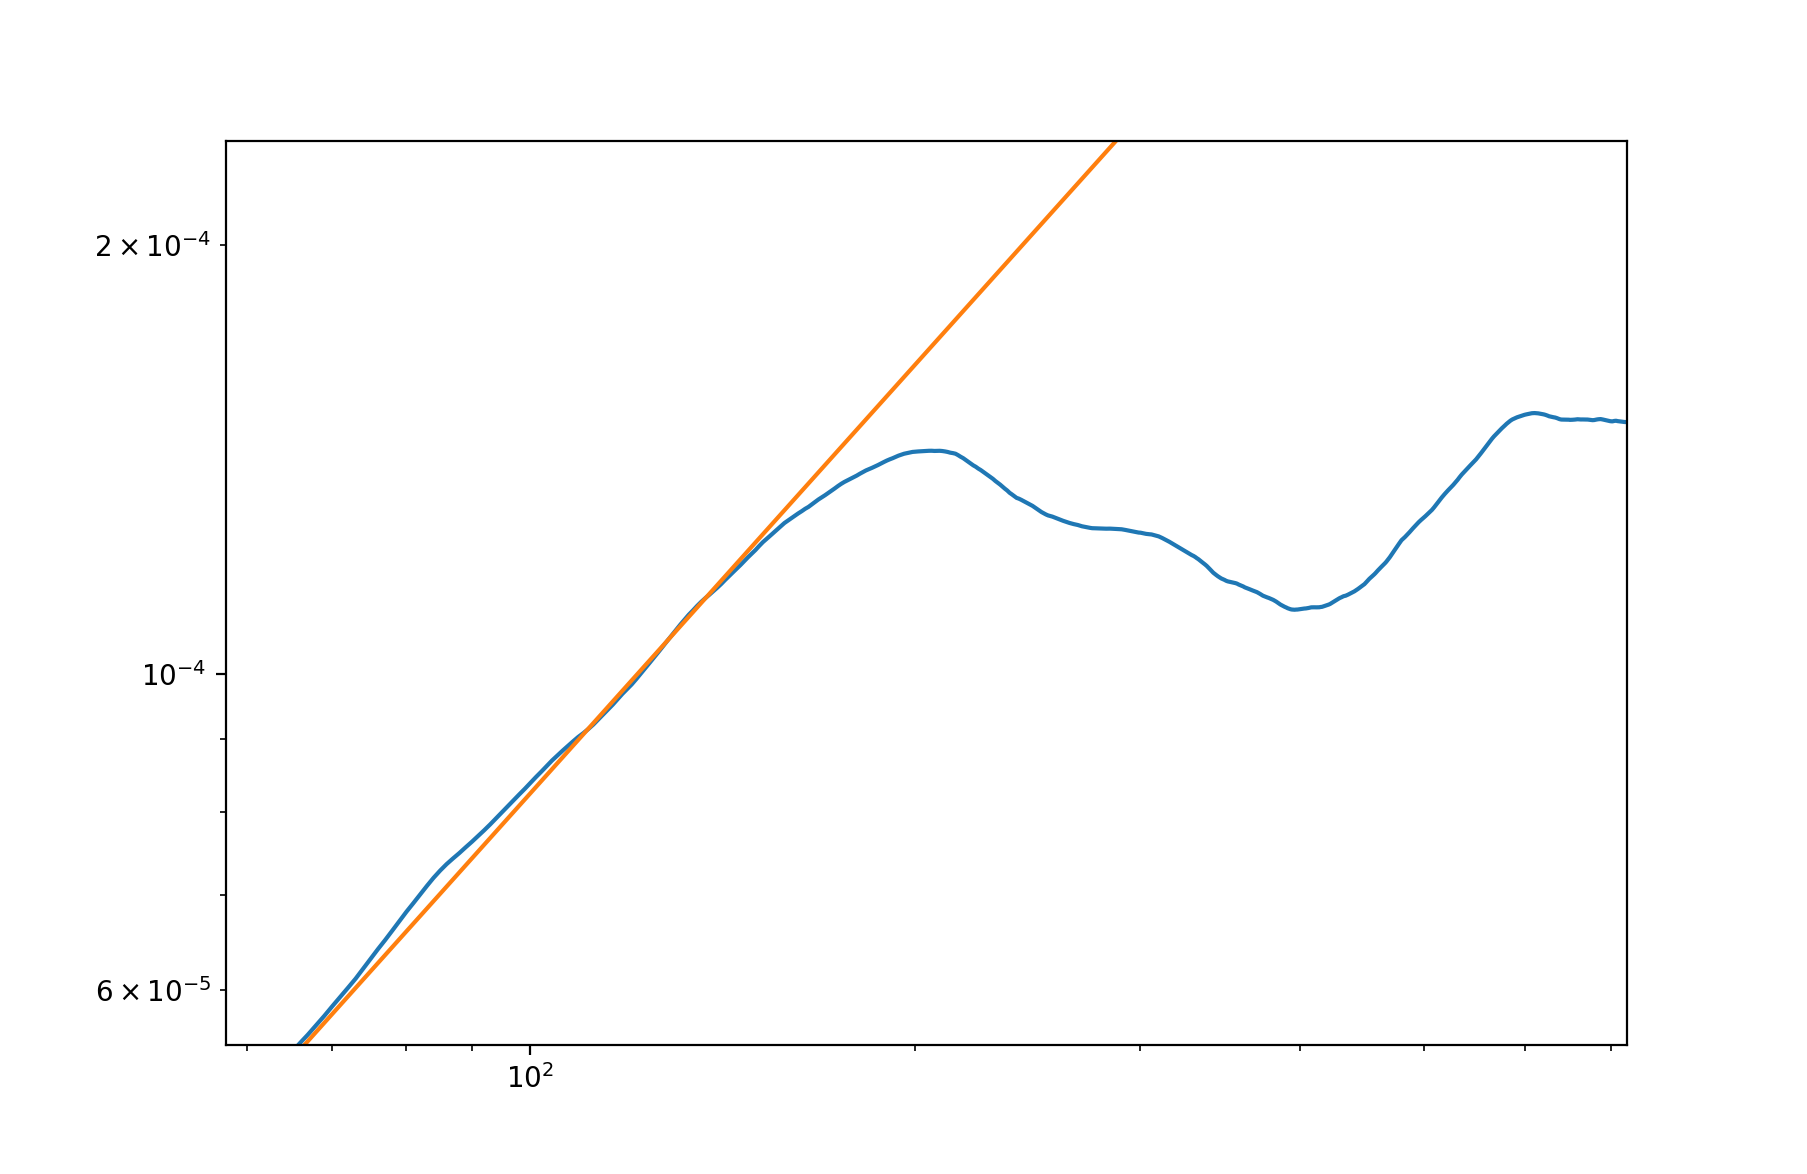

In [5]:
x_axis = range(1, len(msds) + 1)
linear = x_axis * msds[0]

plt.loglog(x_axis, msds)
plt.loglog(x_axis, linear)
plt.show()

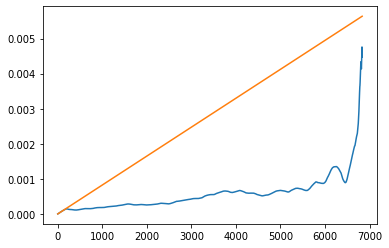

In [9]:
x_axis = range(1, len(msds) + 1)
linear = x_axis * msds[0]

#plt.subplot(111, xscale="log", yscale="log")
#plt.errorbar(x_axis, msds, yerr=ssds)
plt.plot(x_axis, msds)
plt.plot(x_axis, linear)
plt.show()